# Test the Morlet wavelet

## import the module

In [2]:
import numpy as np
from subfunctions.fan_wavelet import xy2kxky, spectral_morlet, fan 

import matplotlib.pyplot as plt

## spectral Morlet wavelet

### construct the spatial data

In [3]:
dx = 2.5
dy = 2.5
L = 8000
x = np.arange(-L/2,L/2,dx)
y = np.arange(-L/2,L/2,dy)
[x,y] = np.meshgrid(x,y)

### give the spectral axis

In [4]:
[K, kx, ky] = xy2kxky(x, dx, dy)

### set the parameters of  the wavelet

In [5]:
p = 2
s = 213
theta = 0
k0 = np.pi*np.sqrt(2/np.log(p))
print(k0)

5.336446256636997


### calculate the spectral Morlet wavelet

In [6]:
psik = spectral_morlet(kx, ky, s, theta, k0)

### plot the spectral Morlet wavelet

212.96984463995466

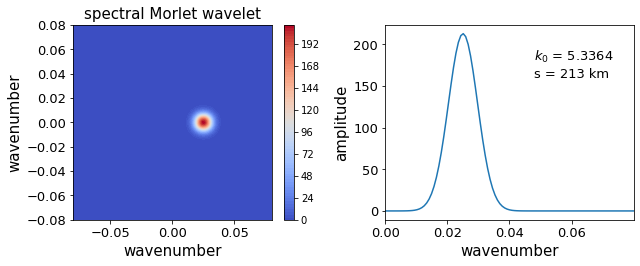

In [7]:
spectral_scale = 0.08
plt.figure(figsize = (9, 3.8))
plt.subplot(1,2,1)
plt.title('spectral Morlet wavelet', fontsize = 15)
plt.contourf(kx, ky, psik, 80, cmap='coolwarm')
plt.xlabel('wavenumber', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlim(-spectral_scale, spectral_scale)
plt.ylabel('wavenumber', fontsize = 15)
plt.yticks(fontsize = 13)
plt.ylim(-spectral_scale, spectral_scale)
plt.colorbar()
plt.subplot(1,2,2)
k_diag = K[1600,:]
psik_diag = psik[1600,:]
L_size = len(k_diag)
plt.plot(k_diag[round(L_size/2):], psik_diag[round(L_size/2):])
plt.xlabel('wavenumber', fontsize = 15)
plt.xticks(fontsize = 13)
plt.ylabel('amplitude', fontsize = 15)
plt.yticks(fontsize = 13)
plt.xlim(0, spectral_scale)
plt.text(spectral_scale*0.6, psik.max()*0.85, '${k_0}$ = ' + str(round(k0, 4)), fontsize = 13)
plt.text(spectral_scale*0.6, psik.max()*0.75, 's = ' + str(s) + ' km', fontsize = 13)
plt.xticks([0, 0.02, 0.04, 0.06])
plt.tight_layout()
psik_diag.max()

## Spatial Morlet wavelet

### using iFFT2 tranform the spectral data into spatial data

In [8]:
spatial_psik = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(psik)))

### plot the spatial Morlet wavelet

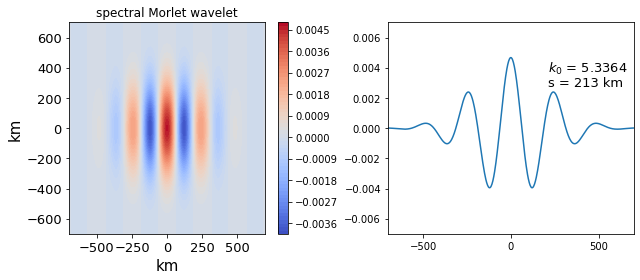

In [9]:
spatial_scale = 700
plt.figure(figsize = (9, 4))
plt.subplot(1,2,1)
plt.title('spectral Morlet wavelet')
plt.contourf(x, y, np.real(spatial_psik), 80, cmap='coolwarm')
plt.xlabel('km', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlim(-spatial_scale, spatial_scale)
plt.ylabel('km', fontsize = 15)
plt.yticks(fontsize = 13)
plt.ylim(-spatial_scale, spatial_scale)
plt.tight_layout()
plt.colorbar()
plt.subplot(1,2,2)
x_diag = x[1600,:]
spatial_diag = spatial_psik[1600,:]
plt.plot(x_diag, np.real(spatial_diag))
plt.xlim(-spatial_scale, spatial_scale)
plt.ylim(-0.007, 0.007)
plt.text(spatial_scale*0.3, np.real(spatial_psik).max()*0.8, '${k_0}$ = ' + str(round(k0, 4)), fontsize = 13)
plt.text(spatial_scale*0.3, np.real(spatial_psik).max()*0.6, 's = ' + str(s) + ' km', fontsize = 13)
plt.xticks([-500, 0, 500])
plt.tight_layout()

# The Fan wavelet


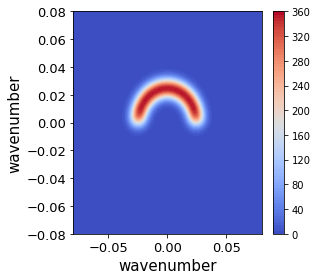

In [10]:
sp = 0.75
psik_fan = fan(kx, ky, s, k0, sp)

plt.figure(figsize = (8, 4))
plt.subplot(1,2,1)
plt.contourf(kx, ky, psik_fan, 80, cmap='coolwarm')
plt.xlabel('wavenumber', fontsize = 15)
plt.xticks(fontsize = 13)
plt.xlim(-spectral_scale, spectral_scale)
plt.ylabel('wavenumber', fontsize = 15)
plt.yticks(fontsize = 13)
plt.ylim(-spectral_scale, spectral_scale)
plt.colorbar()
plt.tight_layout()